# load input files and libraries

In [1]:
import pandas as pd 
import numpy as np 
import scipy
from matplotlib.colors import ListedColormap
import scikit_posthocs
import statannot
import scikit_posthocs as sp
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

#load G3BP1 signal dataframe
G3BP1_df = pd.read_csv('/Users/liang1/Desktop/SG_signal_tables/Objects_Population - G3BP1Spots Selected.txt',sep='\t')

In [2]:
#extract relevant columns from df

workingG_df = G3BP1_df[['Compound', 'Cell Type', 'G3BP1Spots Selected - Relative Spot  Intensity',
                       'G3BP1Spots Selected - ColocalizedSpots',
                       'G3BP1Spots Selected - G3BP1Spots Width [µm]', 'G3BP1Spots Selected - Object No in G3BP1Spots']]

workingG_df.head(3)

,Compound,Cell Type,G3BP1Spots Selected - Relative Spot Intensity,G3BP1Spots Selected - ColocalizedSpots,G3BP1Spots Selected - G3BP1Spots Width [µm],G3BP1Spots Selected - Object No in G3BP1Spots
0,DMSO,WT2,0.049744,1,0.677662,4
1,DMSO,WT2,0.065897,1,0.896381,7
2,DMSO,WT2,0.166706,0,1.299530,10


# Split dataframe by treatment

In [3]:
# split df by treatment
#DMSO
DMSO_df = workingG_df.loc[(workingG_df['Compound']=='DMSO')]

#csc 30ug/mL
CSC30_df = workingG_df.loc[(workingG_df['Compound']=='csc 30ug/mL')]

#csc 100ug/mL
CSC100_df = workingG_df.loc[(workingG_df['Compound']=='csc 100ug/mL')]

#NaAsO2 500uM
As500_df = workingG_df.loc[(workingG_df['Compound']=='NaAsO2 500uM')]

#NaAsO2 1000uM
As1000_df = workingG_df.loc[(workingG_df['Compound']=='NaAsO2 1000uM')]

As1000_df.tail()

,Compound,Cell Type,G3BP1Spots Selected - Relative Spot Intensity,G3BP1Spots Selected - ColocalizedSpots,G3BP1Spots Selected - G3BP1Spots Width [µm],G3BP1Spots Selected - Object No in G3BP1Spots
19723,NaAsO2 1000uM,S34F1,0.113976,0,0.677662,571
19724,NaAsO2 1000uM,S34F1,0.200568,0,1.194450,634
19725,NaAsO2 1000uM,S34F1,0.093209,0,0.677662,642
19726,NaAsO2 1000uM,S34F1,0.164143,0,0.677662,694
19727,NaAsO2 1000uM,S34F1,0.130793,0,0.556940,696


# combine clones

In [4]:
def remove_clonenum(column):
    for string in column.str:
        return string[:len(string)]

dflist = [DMSO_df, CSC30_df, CSC100_df, As500_df, As1000_df]
for df in dflist:
    df['Cell Type'] = remove_clonenum(df['Cell Type'])


# As1000_df['Cell Type'].replace({'WT1': 'WT', 'WT2': 'WT', 'S34F1': 'S34F', 'S34F2': 'S34F'})
As1000_df

/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_3758/2595425471.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  for string in column.str:
/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_3758/2595425471.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cell Type'] = remove_clonenum(df['Cell Type'])


,Compound,Cell Type,G3BP1Spots Selected - Relative Spot Intensity,G3BP1Spots Selected - ColocalizedSpots,G3BP1Spots Selected - G3BP1Spots Width [µm],G3BP1Spots Selected - Object No in G3BP1Spots
15690,NaAsO2 1000uM,W,0.109882,0,0.896381,139
15691,NaAsO2 1000uM,W,0.053607,0,0.600765,143
15692,NaAsO2 1000uM,W,0.111445,0,0.928233,161
15693,NaAsO2 1000uM,W,0.121660,0,0.677662,162
15694,NaAsO2 1000uM,W,0.069255,0,0.556940,172
...,...,...,...,...,...,...
19723,NaAsO2 1000uM,S,0.113976,0,0.677662,571
19724,NaAsO2 1000uM,S,0.200568,0,1.194450,634
19725,NaAsO2 1000uM,S,0.093209,0,0.677662,642
19726,NaAsO2 1000uM,S,0.164143,0,0.677662,694


# normalize SG intensities of treatment condiitons by WT DMSO intensities

In [9]:
#Take median of each DMSO G3BP1 rel spot intensity and divide each value of the treated conditions by it
#first split DMSO df by cell type

#split dfs by cell type for DMSO condition
WT_DMSO_df = DMSO_df.loc[(DMSO_df['Cell Type']=='W')]
S34F_DMSO_df = DMSO_df.loc[(DMSO_df['Cell Type']=='S')]

#calculate medians of DMSO G3BP1 rel spot intensity per genotype
WT_DMSOmedian = WT_DMSO_df['G3BP1Spots Selected - Relative Spot  Intensity'].median()

#calculate median of DMSO G3BP1 spot width per genotype
WT_DMSOwidthMedian = WT_DMSO_df['G3BP1Spots Selected - G3BP1Spots Width [µm]'].median()

#calculate median of DMSO 'G3BP1Spots Selected - Object No in G3BP1Spots'
WT_DMSOtotalcountsMed = WT_DMSO_df['G3BP1Spots Selected - Object No in G3BP1Spots'].median()

#split other treatment dfs by cell type
#30ug/mL CSC
WT_CSC30_df = CSC30_df.loc[(CSC30_df['Cell Type']=='W')]
S34F_CSC30_df = CSC30_df.loc[(CSC30_df['Cell Type']=='S')]

#100ug/mL CSC
WT_CSC100_df = CSC100_df.loc[(CSC100_df['Cell Type']=='W')]
S34F_CSC100_df = CSC100_df.loc[(CSC100_df['Cell Type']=='S')]

#500uM NaAsO2
WT_As500_df = As500_df.loc[(As500_df)['Cell Type']=='W']
S34F_As500_df = As500_df.loc[(As500_df)['Cell Type']=='S']

#1000uM NaAsO2
WT_As1000_df = As1000_df.loc[(As1000_df)['Cell Type']=='W']
S34F_As1000_df = As1000_df.loc[(As1000_df)['Cell Type']=='S']

# S34F_As1000_df.head()

In [10]:
#for each cell type, divide rel spot intensity by DMSO median for wt

WTrelSpotDict = {WT_DMSOmedian:[WT_DMSO_df, WT_CSC30_df, WT_CSC100_df, WT_As500_df, WT_As1000_df]}

#normalize rel G3BP1 spot intensity
for key in WTrelSpotDict.keys():
    WTrelSpotDict[key][0]['Norm G3BP1 Rel Spot Intensity'] = \
    WTrelSpotDict[key][0]['G3BP1Spots Selected - Relative Spot  Intensity'] / key
    
    WTrelSpotDict[key][1]['Norm G3BP1 Rel Spot Intensity'] = \
    WTrelSpotDict[key][1]['G3BP1Spots Selected - Relative Spot  Intensity'] / key
    
    WTrelSpotDict[key][2]['Norm G3BP1 Rel Spot Intensity'] = \
    WTrelSpotDict[key][2]['G3BP1Spots Selected - Relative Spot  Intensity'] / key
    
    WTrelSpotDict[key][3]['Norm G3BP1 Rel Spot Intensity'] = \
    WTrelSpotDict[key][3]['G3BP1Spots Selected - Relative Spot  Intensity'] / key    
    
    WTrelSpotDict[key][4]['Norm G3BP1 Rel Spot Intensity'] = \
    WTrelSpotDict[key][4]['G3BP1Spots Selected - Relative Spot  Intensity'] / key
    
S34FrelSpotDict = {WT_DMSOmedian:[S34F_DMSO_df, S34F_CSC30_df, S34F_CSC100_df, S34F_As500_df, S34F_As1000_df]}
for key in S34FrelSpotDict.keys():
    S34FrelSpotDict[key][0]['Norm G3BP1 Rel Spot Intensity'] = \
    S34FrelSpotDict[key][0]['G3BP1Spots Selected - Relative Spot  Intensity'] / key
    
    S34FrelSpotDict[key][1]['Norm G3BP1 Rel Spot Intensity'] = \
    S34FrelSpotDict[key][1]['G3BP1Spots Selected - Relative Spot  Intensity'] / key
    
    S34FrelSpotDict[key][2]['Norm G3BP1 Rel Spot Intensity'] = \
    S34FrelSpotDict[key][2]['G3BP1Spots Selected - Relative Spot  Intensity'] / key
    
    S34FrelSpotDict[key][3]['Norm G3BP1 Rel Spot Intensity'] = \
    S34FrelSpotDict[key][3]['G3BP1Spots Selected - Relative Spot  Intensity'] / key
    
    S34FrelSpotDict[key][4]['Norm G3BP1 Rel Spot Intensity'] = \
    S34FrelSpotDict[key][4]['G3BP1Spots Selected - Relative Spot  Intensity'] / key
    
WTnumSpotDict = {WT_DMSOtotalcountsMed:[WT_DMSO_df, WT_CSC30_df, WT_CSC100_df, WT_As500_df, WT_As1000_df]}
for key in WTnumSpotDict.keys():    
    WTnumSpotDict[key][0]['Norm G3BP1 spot number'] = \
    WTnumSpotDict[key][0]['G3BP1Spots Selected - Object No in G3BP1Spots'] / key
    
    WTnumSpotDict[key][1]['Norm G3BP1 spot number'] = \
    WTnumSpotDict[key][1]['G3BP1Spots Selected - Object No in G3BP1Spots'] / key
    
    WTnumSpotDict[key][2]['Norm G3BP1 spot number'] = \
    WTnumSpotDict[key][2]['G3BP1Spots Selected - Object No in G3BP1Spots'] / key
    
    WTnumSpotDict[key][3]['Norm G3BP1 spot number'] = \
    WTnumSpotDict[key][3]['G3BP1Spots Selected - Object No in G3BP1Spots'] / key
        
    WTnumSpotDict[key][4]['Norm G3BP1 spot number'] = \
    WTnumSpotDict[key][4]['G3BP1Spots Selected - Object No in G3BP1Spots'] / key
    
S34FnumSpotDict = {WT_DMSOtotalcountsMed:[S34F_DMSO_df, S34F_CSC30_df, S34F_CSC100_df, S34F_As500_df, S34F_As1000_df]}
for key in S34FnumSpotDict.keys():    
    S34FnumSpotDict[key][0]['Norm G3BP1 spot number'] = \
    S34FnumSpotDict[key][0]['G3BP1Spots Selected - Object No in G3BP1Spots'] / key
    
    S34FnumSpotDict[key][1]['Norm G3BP1 spot number'] = \
    S34FnumSpotDict[key][1]['G3BP1Spots Selected - Object No in G3BP1Spots'] / key
    
    S34FnumSpotDict[key][2]['Norm G3BP1 spot number'] = \
    S34FnumSpotDict[key][2]['G3BP1Spots Selected - Object No in G3BP1Spots'] / key
    
    S34FnumSpotDict[key][3]['Norm G3BP1 spot number'] = \
    S34FnumSpotDict[key][3]['G3BP1Spots Selected - Object No in G3BP1Spots'] / key
    
    S34FnumSpotDict[key][4]['Norm G3BP1 spot number'] = \
    S34FnumSpotDict[key][4]['G3BP1Spots Selected - Object No in G3BP1Spots'] / key

WTspotWidthDict = {WT_DMSOwidthMedian:[WT_DMSO_df, WT_CSC30_df, WT_CSC100_df, WT_As500_df, WT_As1000_df]}

for key in WTspotWidthDict.keys():    
    WTspotWidthDict[key][0]['Norm G3BP1 spot width [um]'] = \
    WTspotWidthDict[key][0]['G3BP1Spots Selected - G3BP1Spots Width [µm]'] / key
    
    WTspotWidthDict[key][1]['Norm G3BP1 spot width [um]'] = \
    WTspotWidthDict[key][1]['G3BP1Spots Selected - G3BP1Spots Width [µm]'] / key
    
    WTspotWidthDict[key][2]['Norm G3BP1 spot width [um]'] = \
    WTspotWidthDict[key][2]['G3BP1Spots Selected - G3BP1Spots Width [µm]'] / key
    
    WTspotWidthDict[key][3]['Norm G3BP1 spot width [um]'] = \
    WTspotWidthDict[key][3]['G3BP1Spots Selected - G3BP1Spots Width [µm]'] / key    
    
    WTspotWidthDict[key][4]['Norm G3BP1 spot width [um]'] = \
    WTspotWidthDict[key][4]['G3BP1Spots Selected - G3BP1Spots Width [µm]'] / key
    
    
S34FspotWidthDict = {WT_DMSOwidthMedian: [S34F_DMSO_df, S34F_CSC30_df, S34F_CSC100_df, S34F_As500_df, S34F_As1000_df]}
for key in S34FspotWidthDict.keys():    
    S34FspotWidthDict[key][0]['Norm G3BP1 spot width [um]'] = \
    S34FspotWidthDict[key][0]['G3BP1Spots Selected - G3BP1Spots Width [µm]'] / key
    
    S34FspotWidthDict[key][1]['Norm G3BP1 spot width [um]'] = \
    S34FspotWidthDict[key][1]['G3BP1Spots Selected - G3BP1Spots Width [µm]'] / key
    
    S34FspotWidthDict[key][2]['Norm G3BP1 spot width [um]'] = \
    S34FspotWidthDict[key][2]['G3BP1Spots Selected - G3BP1Spots Width [µm]'] / key
    
    S34FspotWidthDict[key][3]['Norm G3BP1 spot width [um]'] = \
    S34FspotWidthDict[key][3]['G3BP1Spots Selected - G3BP1Spots Width [µm]'] / key
    
    S34FspotWidthDict[key][4]['Norm G3BP1 spot width [um]'] = \
    S34FspotWidthDict[key][4]['G3BP1Spots Selected - G3BP1Spots Width [µm]'] / key
    
#two keys can't have the same value in a dict and S34F1 and S34F2 just happen to have the same median. 
#so do S34F2 separately

# S34F2_list = [S34F2_CSC30_df, S34F2_CSC100_df, S34F2_As500_df, S34F2_As1000_df]
# for df in S34F2_list:
#     df['Norm G3BP1 spot width [um]'] = df['G3BP1Spots Selected - G3BP1Spots Width [µm]']/S34F2_DMSOwidthMedian
    
S34F_CSC30_df.head()

/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_3758/3311539947.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WTrelSpotDict[key][0]['Norm G3BP1 Rel Spot Intensity'] = \
/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_3758/3311539947.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WTrelSpotDict[key][1]['Norm G3BP1 Rel Spot Intensity'] = \
/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_3758/3311539947.py:13: SettingWithCopyWarning: 
A value is trying to be set on a

,Compound,Cell Type,G3BP1Spots Selected - Relative Spot Intensity,G3BP1Spots Selected - ColocalizedSpots,G3BP1Spots Selected - G3BP1Spots Width [µm],G3BP1Spots Selected - Object No in G3BP1Spots,Norm G3BP1 Rel Spot Intensity,Norm G3BP1 spot number,Norm G3BP1 spot width [um]
6285,csc 30ug/mL,S,0.031029,0,0.556940,80,0.275941,0.067454,0.621321
6286,csc 30ug/mL,S,0.292956,0,0.896381,200,2.605223,0.168634,1.000000
6287,csc 30ug/mL,S,0.303590,0,0.928233,203,2.699790,0.171164,1.035534
6288,csc 30ug/mL,S,0.150928,0,0.677662,268,1.342185,0.225970,0.755998
6289,csc 30ug/mL,S,0.044352,0,0.556940,272,0.394419,0.229342,0.621321


In [11]:
#concat dataframes back together to plot all genotypes by treatment conditoon
DMSO_df = pd.concat([WT_DMSO_df, S34F_DMSO_df], join="outer")

CSC30_df = pd.concat([WT_CSC30_df, S34F_CSC30_df], join="outer")
    
CSC100_df = pd.concat([WT_CSC100_df, S34F_CSC100_df], join="outer")

As500_df = pd.concat([WT_As500_df, S34F_As500_df], join="outer")

# As1000_df = pd.concat([WT_As1000_df, S34F_As1000_df], join="outer")

DMSO_df

,Compound,Cell Type,G3BP1Spots Selected - Relative Spot Intensity,G3BP1Spots Selected - ColocalizedSpots,G3BP1Spots Selected - G3BP1Spots Width [µm],G3BP1Spots Selected - Object No in G3BP1Spots,Norm G3BP1 Rel Spot Intensity,Norm G3BP1 spot number,Norm G3BP1 spot width [um]
0,DMSO,W,0.049744,1,0.677662,4,0.442363,0.003373,0.755998
1,DMSO,W,0.065897,1,0.896381,7,0.586018,0.005902,1.000000
2,DMSO,W,0.166706,0,1.299530,10,1.482497,0.008432,1.449752
3,DMSO,W,0.142806,0,1.499590,12,1.269957,0.010118,1.672938
4,DMSO,W,0.050920,0,0.677662,92,0.452826,0.077572,0.755998
...,...,...,...,...,...,...,...,...,...
3982,DMSO,S,0.055926,0,0.556940,277,0.497348,0.233558,0.621321
3983,DMSO,S,0.197462,0,1.299530,302,1.756006,0.254637,1.449752
3984,DMSO,S,0.126541,0,0.677662,332,1.125314,0.279933,0.755998
3985,DMSO,S,0.072054,0,0.556940,337,0.640766,0.284148,0.621321


In [12]:
DMSO_df

,Compound,Cell Type,G3BP1Spots Selected - Relative Spot Intensity,G3BP1Spots Selected - ColocalizedSpots,G3BP1Spots Selected - G3BP1Spots Width [µm],G3BP1Spots Selected - Object No in G3BP1Spots,Norm G3BP1 Rel Spot Intensity,Norm G3BP1 spot number,Norm G3BP1 spot width [um]
0,DMSO,W,0.049744,1,0.677662,4,0.442363,0.003373,0.755998
1,DMSO,W,0.065897,1,0.896381,7,0.586018,0.005902,1.000000
2,DMSO,W,0.166706,0,1.299530,10,1.482497,0.008432,1.449752
3,DMSO,W,0.142806,0,1.499590,12,1.269957,0.010118,1.672938
4,DMSO,W,0.050920,0,0.677662,92,0.452826,0.077572,0.755998
...,...,...,...,...,...,...,...,...,...
3982,DMSO,S,0.055926,0,0.556940,277,0.497348,0.233558,0.621321
3983,DMSO,S,0.197462,0,1.299530,302,1.756006,0.254637,1.449752
3984,DMSO,S,0.126541,0,0.677662,332,1.125314,0.279933,0.755998
3985,DMSO,S,0.072054,0,0.556940,337,0.640766,0.284148,0.621321


In [21]:
#count number of g3bp1 spots in each plate (G3BP1Spots Selected - Object No in G3BP1Spots)

wtdmsosum = WT_DMSO_df['G3BP1Spots Selected - Object No in G3BP1Spots'].sum()
wtcsc30sum = WT_CSC30_df['G3BP1Spots Selected - Object No in G3BP1Spots'].sum()
wtcsc100sum = WT_CSC100_df['G3BP1Spots Selected - Object No in G3BP1Spots'].sum()
wtas500sum = WT_As500_df['G3BP1Spots Selected - Object No in G3BP1Spots'].sum()

s34fdmsosum = S34F_DMSO_df['G3BP1Spots Selected - Object No in G3BP1Spots'].sum()
s34fcsc30sum = S34F_CSC30_df['G3BP1Spots Selected - Object No in G3BP1Spots'].sum()
s34fcsc100sum = S34F_CSC100_df['G3BP1Spots Selected - Object No in G3BP1Spots'].sum()
s34fas500sum = S34F_As500_df['G3BP1Spots Selected - Object No in G3BP1Spots'].sum()

dmsocounts = [wtdmsosum, s34fdmsosum]
csc30counts = [wtcsc30sum, s34fcsc30sum]
csc100counts = [wtcsc100sum, s34fcsc100sum]
as500counts = [wtas500sum, s34fas500sum]


dmsonobs = [str(x) for x in dmsocounts]
dmsonobs = ["n: " + i for i in dmsonobs]

csc30nobs = [str(x) for x in csc30counts]
csc30nobs = ["n: " + i for i in csc30nobs]

csc100nobs = [str(x) for x in csc100counts]
csc100nobs = ["n: " + i for i in csc100nobs]

as500nobs = [str(x) for x in as500counts]
as500nobs = ["n: " + i for i in as500nobs]

# Make violin plots for normalized things

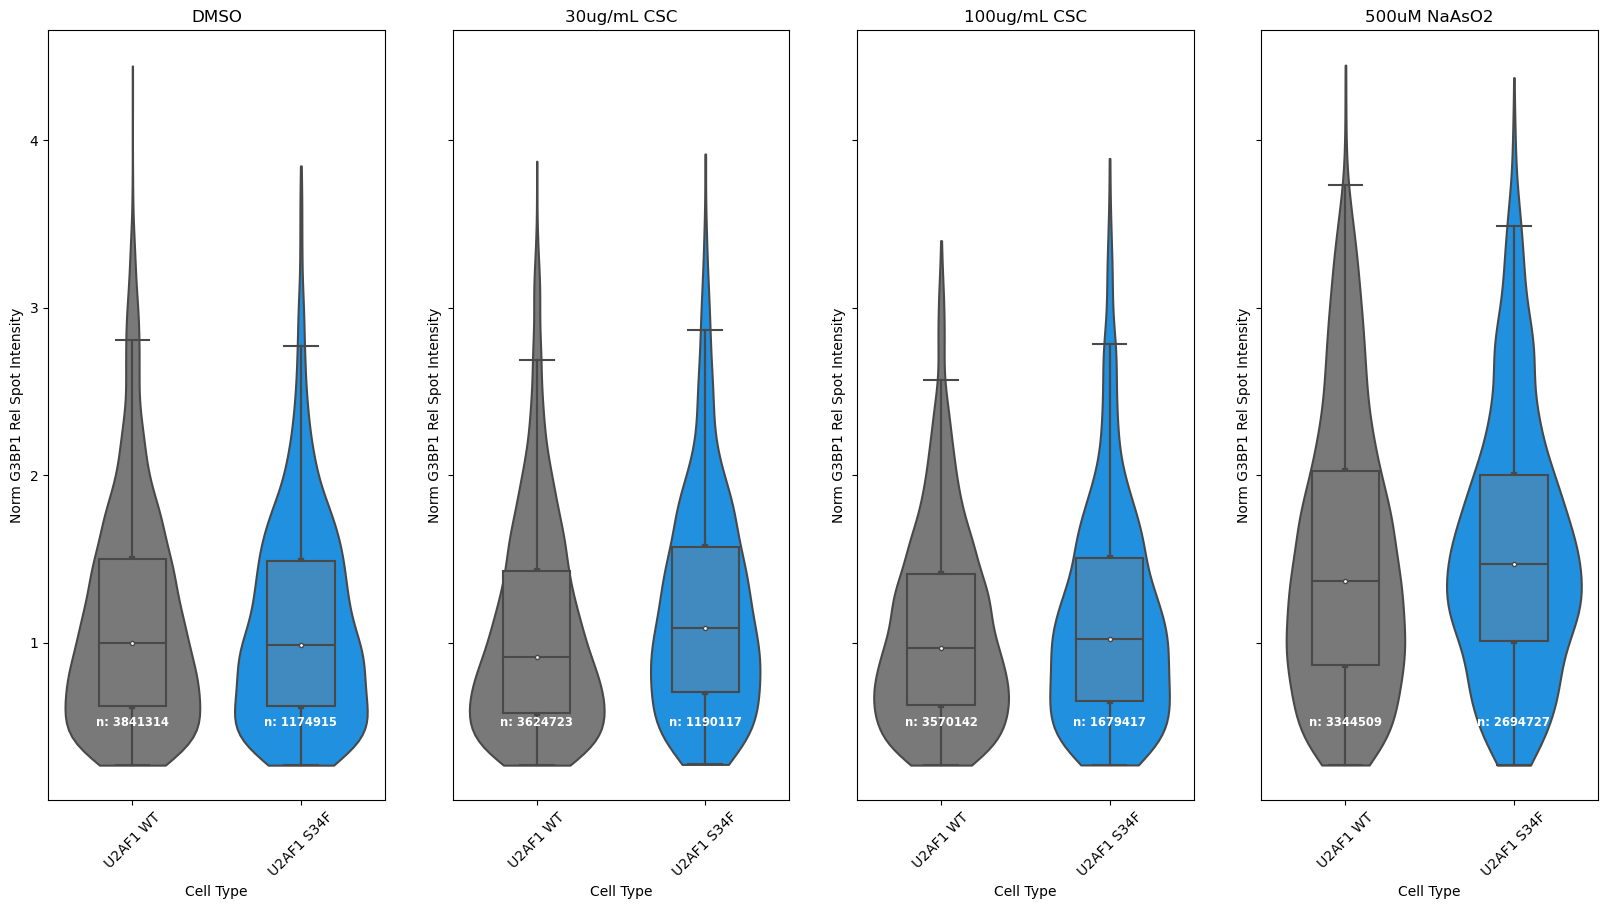

In [22]:
#make violin plots of spot intensity

fig, ax = plt.subplots(1, 4, sharey=True, sharex=True, figsize=(20,10))
my_pal = {'W': "#797979", 'S':'#0095FF'}
genotypes = ['U2AF1 WT', 'U2AF1 S34F']

#relative G3BP1 spot intensity

ax1=sns.violinplot(data=DMSO_df, ax=ax[0], x='Cell Type', y='Norm G3BP1 Rel Spot Intensity', 
                palette=my_pal, inner='box', cut=0)
ax1 = sns.boxplot(data=DMSO_df, ax=ax[0], x='Cell Type', y='Norm G3BP1 Rel Spot Intensity', saturation=0.5, 
                  width=0.4, palette=my_pal, boxprops={'zorder': 2}, showfliers=False)

dmsopos = range(len(dmsonobs))
for tick, label in zip(dmsopos, ax1.get_xticklabels()):
    ax1.text(dmsopos[tick], 0.2 + 0.3, dmsonobs[tick],
        horizontalalignment='center',
        size='small',
        color='w',
        weight='semibold')

ax2=sns.violinplot(data=CSC30_df, ax=ax[1], x='Cell Type', y='Norm G3BP1 Rel Spot Intensity', 
                palette=my_pal, inner='box', cut=0)
ax2 = sns.boxplot(data=CSC30_df, ax=ax[1], x='Cell Type', y='Norm G3BP1 Rel Spot Intensity', saturation=0.5, 
                  width=0.4,palette=my_pal, boxprops={'zorder': 2}, showfliers=False)

csc30pos = range(len(csc30nobs))
for tick, label in zip(csc30pos, ax2.get_xticklabels()):
    ax2.text(csc30pos[tick], 0.2 + 0.3, csc30nobs[tick],
        horizontalalignment='center',
        size='small',
        color='w',
        weight='semibold')

ax3=sns.violinplot(data=CSC100_df, ax=ax[2], x='Cell Type', y='Norm G3BP1 Rel Spot Intensity', 
                palette=my_pal, inner='box', cut=0)
ax3 = sns.boxplot(data=CSC100_df, ax=ax[2], x='Cell Type', y='Norm G3BP1 Rel Spot Intensity', saturation=0.5, 
                  width=0.4, palette=my_pal, boxprops={'zorder': 2}, showfliers=False)

csc100pos = range(len(csc100nobs))
for tick, label in zip(csc100pos, ax3.get_xticklabels()):
    ax3.text(csc100pos[tick], 0.2 + 0.3, csc100nobs[tick],
        horizontalalignment='center',
        size='small',
        color='w',
        weight='semibold')

ax4=sns.violinplot(data=As500_df, ax=ax[3], x='Cell Type', y='Norm G3BP1 Rel Spot Intensity', 
                palette=my_pal, inner='box', cut=0)
ax4=sns.boxplot(data=As500_df, ax=ax[3], x='Cell Type', y='Norm G3BP1 Rel Spot Intensity', saturation=0.5, 
                width=0.4, palette=my_pal, boxprops={'zorder': 2}, showfliers=False)

as500pos = range(len(as500nobs))
for tick, label in zip(as500pos, ax4.get_xticklabels()):
    ax4.text(as500pos[tick], 0.2 + 0.3, as500nobs[tick],
        horizontalalignment='center',
        size='small',
        color='w',
        weight='semibold')

ax1.title.set_text('DMSO')
ax2.title.set_text('30ug/mL CSC')
ax3.title.set_text('100ug/mL CSC')
ax4.title.set_text('500uM NaAsO2')

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.set_xticklabels(genotypes, rotation=45)

# stat analysis

In [39]:
# DMSO_df = pd.concat([WT_DMSO_df, S34F_DMSO_df], join="outer")

# CSC30_df = pd.concat([WT_CSC30_df, S34F_CSC30_df], join="outer")
    
# CSC100_df = pd.concat([WT_CSC100_df, S34F_CSC100_df], join="outer")

# As500_df = pd.concat([WT_As500_df, S34F_As500_df], join="outer")

# As1000_df = pd.concat([WT_As1000_df, S34F_As1000_df], join="outer")

from scipy.stats import ranksums

#dmso
ranksums(DMSO_df['Norm G3BP1 Rel Spot Intensity'].loc[(DMSO_df['Cell Type'] == 'W')], 
         DMSO_df['Norm G3BP1 Rel Spot Intensity'].loc[(DMSO_df['Cell Type'] == 'S')])
                                                          
#RanksumsResult(statistic=0.4642042452543637, pvalue=0.642501419961256)

RanksumsResult(statistic=0.4642042452543637, pvalue=0.642501419961256)

In [40]:
#csc 30
ranksums(CSC30_df['Norm G3BP1 Rel Spot Intensity'].loc[(CSC30_df['Cell Type'] == 'W')], 
         CSC30_df['Norm G3BP1 Rel Spot Intensity'].loc[(CSC30_df['Cell Type'] == 'S')])
#RanksumsResult(statistic=-6.455908355285098, pvalue=1.0757169513674788e-10)

RanksumsResult(statistic=-6.455908355285098, pvalue=1.0757169513674788e-10)

In [41]:
#csc 100
ranksums(CSC100_df['Norm G3BP1 Rel Spot Intensity'].loc[(CSC100_df['Cell Type'] == 'W')], 
         CSC100_df['Norm G3BP1 Rel Spot Intensity'].loc[(CSC100_df['Cell Type'] == 'S')])
#RanksumsResult(statistic=-2.3050420109379197, pvalue=0.0211642206816614)

RanksumsResult(statistic=-2.3050420109379197, pvalue=0.0211642206816614)

In [42]:
#naaso2 500uM

ranksums(As500_df['Norm G3BP1 Rel Spot Intensity'].loc[(As500_df['Cell Type'] == 'W')], 
         As500_df['Norm G3BP1 Rel Spot Intensity'].loc[(As500_df['Cell Type'] == 'S')])

#RanksumsResult(statistic=-3.4451730583554423, pvalue=0.0005706938858590594)

RanksumsResult(statistic=-3.4451730583554423, pvalue=0.0005706938858590594)

In [43]:
#naaso2 1000uM

ranksums(As1000_df['Norm G3BP1 Rel Spot Intensity'].loc[(As1000_df['Cell Type'] == 'W')], 
         As1000_df['Norm G3BP1 Rel Spot Intensity'].loc[(As1000_df['Cell Type'] == 'S')])

#RanksumsResult(statistic=0.6789978257007101, pvalue=0.4971392396212566)

RanksumsResult(statistic=0.6789978257007101, pvalue=0.4971392396212566)